# IMPORTANDO LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **Objetivo: Predecir el consumo de electricidad**

In [2]:
df = pd.read_csv('../Data/datos_seattle.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657 entries, 0 to 30656
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   30657 non-null  int64  
 1   datayear                        30657 non-null  int64  
 2   buildingname                    30657 non-null  object 
 3   buildingtype                    30657 non-null  object 
 4   taxparcelidentificationnumber   30657 non-null  object 
 5   address                         30657 non-null  object 
 6   city                            30657 non-null  object 
 7   state                           30657 non-null  object 
 8   zipcode                         30657 non-null  int64  
 9   latitude                        30657 non-null  float64
 10  longitude                       30657 non-null  float64
 11  neighborhood                    30657 non-null  object 
 12  councildistrictcode             

In [4]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

steamuse_kbtu                     96.552174
thirdlargestpropertyusetypegfa    78.706331
thirdlargestpropertyusetype       78.181166
secondlargestpropertyusetype      42.871122
secondlargestpropertyuse          42.871122
naturalgas_kbtu                   37.475944
naturalgas_therms                 37.475944
energystarscore                   25.958182
siteeuiwn_kbtu_sf                  3.937111
sourceeuiwn_kbtu_sf                3.937111
siteenergyusewn_kbtu               3.920801
siteeui_kbtu_sf                    2.925922
sourceeui_kbtu_sf                  2.925922
siteenergyuse_kbtu                 2.909613
electricity_kwh                    1.895163
electricity_kbtu                   1.891901
ghgemissionsintensity              1.630949
totalghgemissions                  1.624425
complianceissue                    1.063379
numberofbuildings                  0.958998
numberoffloors                     0.270738
largestpropertyusetype             0.153309
largestpropertyusetypegfa       

Al analizar el conjunto de datos, se observa que las columnas `ThirdLargestPropertyUseTypeGFA`, `ThirdLargestPropertyUseType`, `SecondLargestPropertyUseType` y `SecondLargestPropertyUse` presentan un alto porcentaje de valores nulos, específicamente 78.7% y 42.9% respectivamente. Además, dado que el objetivo principal es predecir el consumo total de energía, estas variables no aportan información relevante para el análisis.

Consideraciones:

- Alto porcentaje de datos faltantes: Columnas con un elevado número de valores nulos pueden introducir sesgos y reducir la precisión del modelo. Cuando una variable tiene más del 80% de datos faltantes, es común considerar su eliminación para mantener la integridad del análisis. ​
Medium

- Relevancia para el modelo: Dado que el interés se centra en predecir el consumo total de energía, y estas columnas están relacionadas con usos secundarios o terciarios de la propiedad, su contribución al modelo es limitada.

Conclusión:

Debido al alto porcentaje de valores nulos y a su baja relevancia para el objetivo del análisis, procederé a eliminar las columnas ThirdLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, SecondLargestPropertyUseType y SecondLargestPropertyUse del conjunto de datos. Esta acción permitirá simplificar el modelo y mejorar su rendimiento al centrarse en variables más completas y pertinentes.

In [5]:
treshold = 37

serie_a_eliminar = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

columnas_a_eliminar = serie_a_eliminar[serie_a_eliminar>treshold].index.to_list()

df.drop(columns=columnas_a_eliminar, inplace=True)

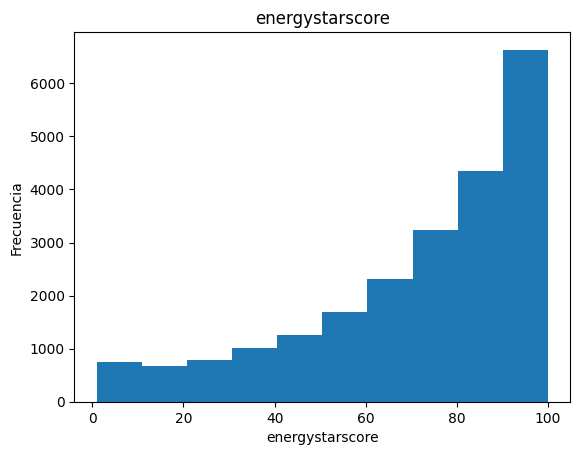

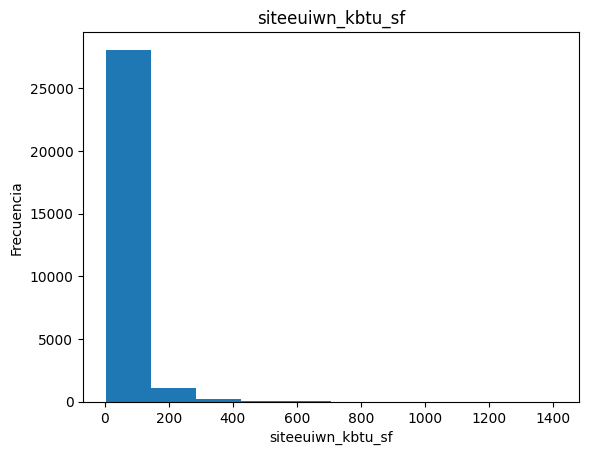

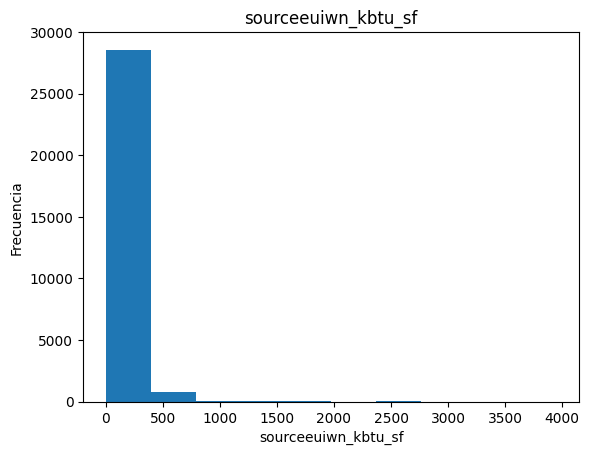

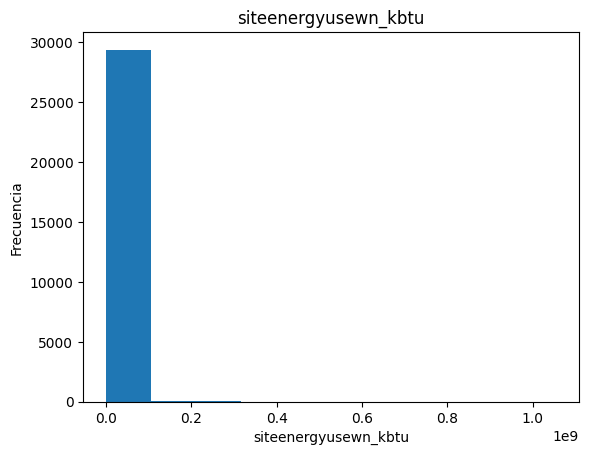

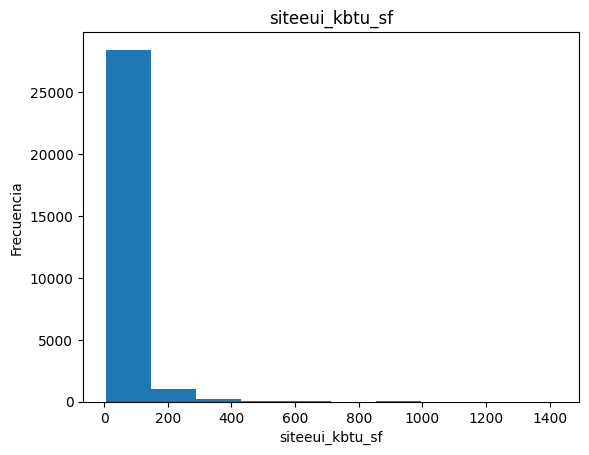

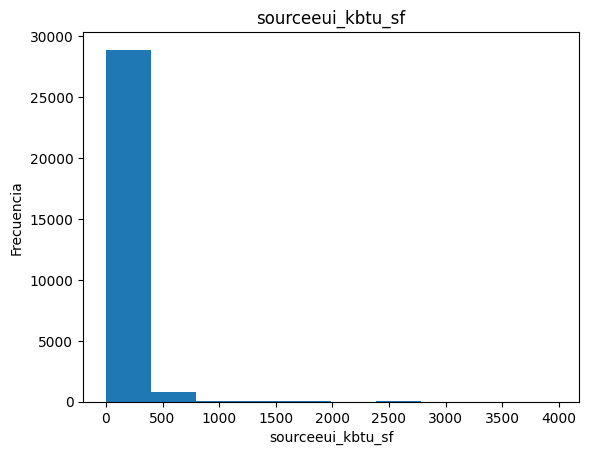

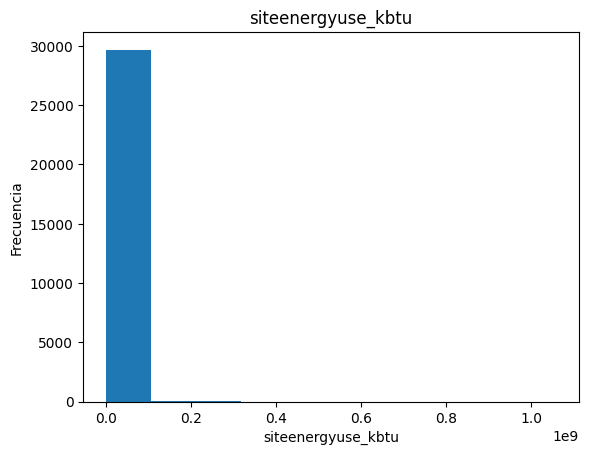

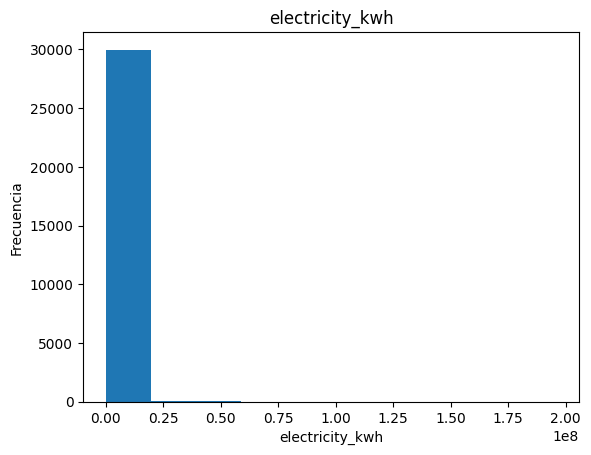

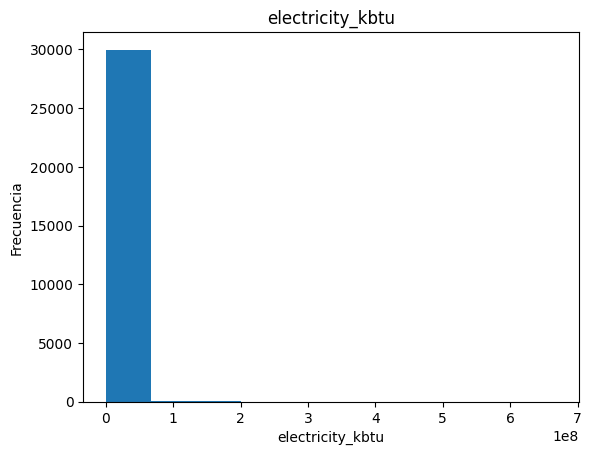

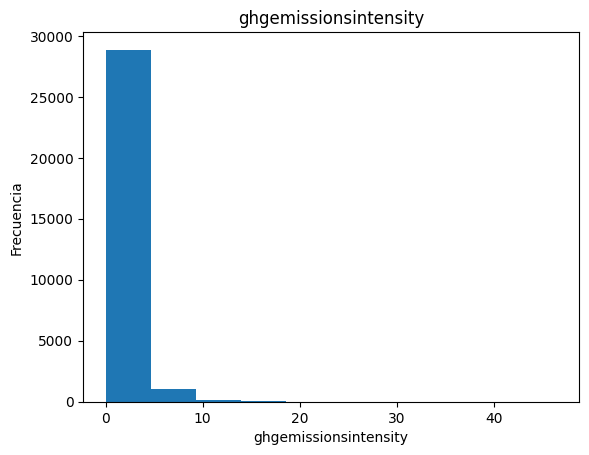

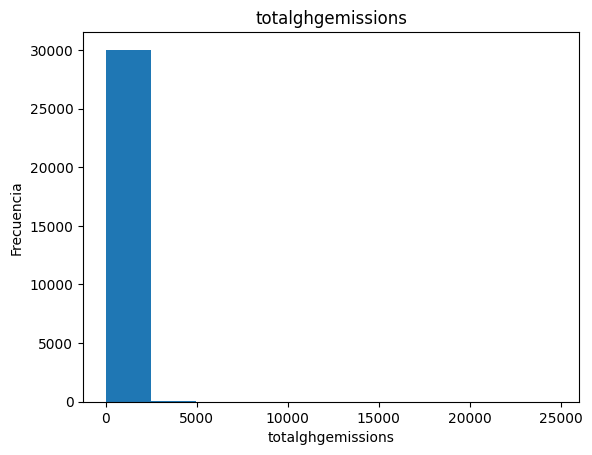

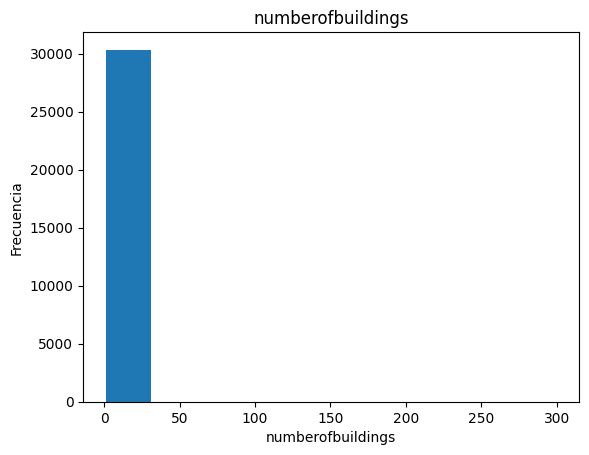

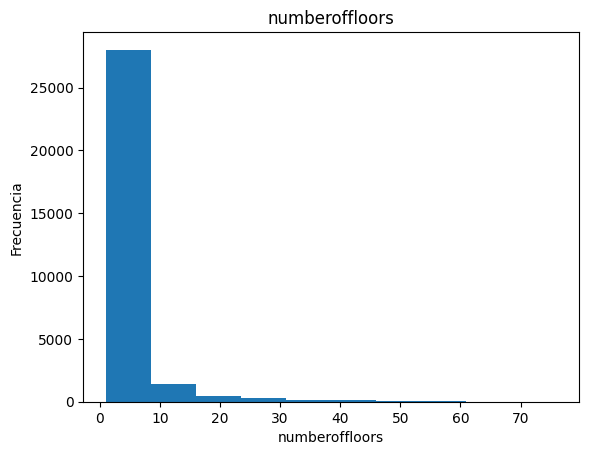

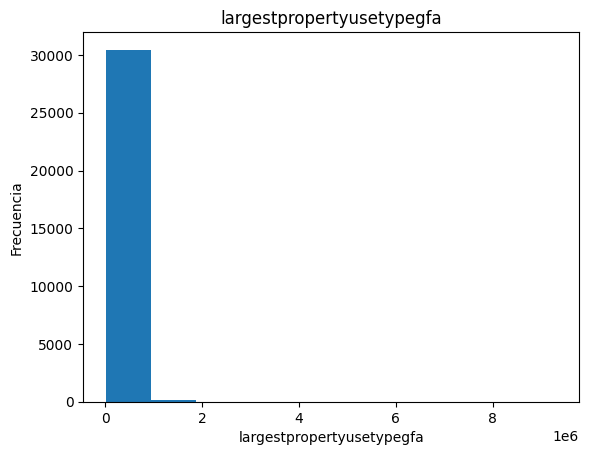

In [6]:
treshold = 0
series_nulos = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

for col in series_nulos[series_nulos>treshold].index:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()


In [7]:
input_columns = [col for col in series_nulos[series_nulos>treshold].index if pd.api.types.is_numeric_dtype(df[col])]
input_columns
    

['energystarscore',
 'siteeuiwn_kbtu_sf',
 'sourceeuiwn_kbtu_sf',
 'siteenergyusewn_kbtu',
 'siteeui_kbtu_sf',
 'sourceeui_kbtu_sf',
 'siteenergyuse_kbtu',
 'electricity_kwh',
 'electricity_kbtu',
 'ghgemissionsintensity',
 'totalghgemissions',
 'numberofbuildings',
 'numberoffloors',
 'largestpropertyusetypegfa']

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[input_columns] = imputer.fit_transform(df[input_columns])

In [9]:
df.isnull().sum()

osebuildingid                      0
datayear                           0
buildingname                       0
buildingtype                       0
taxparcelidentificationnumber      0
address                            0
city                               0
state                              0
zipcode                            0
latitude                           0
longitude                          0
neighborhood                       0
councildistrictcode                0
yearbuilt                          0
numberoffloors                     0
numberofbuildings                  0
propertygfatotal                   0
propertygfabuildings               0
propertygfaparking                 0
selfreportgfatotal                 0
selfreportgfabuildings             0
selfreportparking                  0
energystarscore                    0
siteeuiwn_kbtu_sf                  0
siteeui_kbtu_sf                    0
siteenergyuse_kbtu                 0
siteenergyusewn_kbtu               0
s

In [10]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

complianceissue                  1.063379
largestpropertyusetype           0.153309
epapropertytype                  0.127214
buildingtype                     0.000000
osebuildingid                    0.000000
datayear                         0.000000
buildingname                     0.000000
city                             0.000000
address                          0.000000
taxparcelidentificationnumber    0.000000
state                            0.000000
neighborhood                     0.000000
zipcode                          0.000000
latitude                         0.000000
longitude                        0.000000
numberofbuildings                0.000000
propertygfatotal                 0.000000
propertygfabuildings             0.000000
propertygfaparking               0.000000
selfreportgfatotal               0.000000
councildistrictcode              0.000000
yearbuilt                        0.000000
numberoffloors                   0.000000
energystarscore                  0

In [11]:
df = df.dropna(subset=['complianceissue', 'largestpropertyusetype', 'epapropertytype'])


In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df

,osebuildingid,datayear,buildingname,buildingtype,taxparcelidentificationnumber,address,city,state,zipcode,latitude,...,epapropertytype,largestpropertyusetype,largestpropertyusetypegfa,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
0,1,2023,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.61220,...,Hotel,Hotel,88434.0,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False
1,2,2023,PARAMOUNT HOTEL,NonResidential,659000220,724 PINE ST,SEATTLE,WA,98101,47.61307,...,Hotel,Hotel,88502.0,786237.0,Compliant,No Issue,2682640.0,220.0,2.49,False
2,3,2023,WESTIN HOTEL (Parent Building),NonResidential,659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,...,Hotel,Hotel,827566.0,11121130.0,Compliant,No Issue,37945296.0,2192.8,2.89,False
3,5,2023,HOTEL MAX,NonResidential,659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,...,Hotel,Hotel,61320.0,780180.0,Compliant,No Issue,2661973.0,176.1,2.87,False
4,8,2023,WARWICK SEATTLE HOTEL,NonResidential,659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,...,Hotel,Hotel,123445.0,1401668.0,Compliant,No Issue,4782491.0,456.6,4.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,50038,2015,Salmon Bay Marine Center West,NonResidential,2771605298,2360 W COMMODORE WAY,SEATTLE,WA,98199,47.66144,...,Mixed Use Property,Office,11745.0,184235.0,Compliant,No Issue,628609.0,3.6,0.14,False
30653,50049,2015,PACIFIC CENTER CONDOMINIUM,Multifamily LR (1-4),6599950000,321 10TH AVE S,SEATTLE,WA,98104,47.59980,...,Multifamily LR (1-4),Multifamily Housing,44650.0,334979.0,Compliant,No Issue,1142949.0,6.6,0.15,False
30654,50055,2015,IDENTITY APTS 4123,Multifamily MR (5-9),1142001670,4123 12TH AVE NE,SEATTLE,WA,98105,47.65756,...,Multifamily MR (5-9),Multifamily Housing,31748.0,325705.0,Compliant,No Issue,1111306.0,29.3,0.69,False
30655,50057,2015,CIRRUS,Multifamily HR (10+),660000575,2030 8TH AVE,SEATTLE,WA,98121,47.61652,...,Multifamily HR (10+),Multifamily Housing,414026.0,1690364.0,Compliant,No Issue,5767522.0,620.0,2.23,False


In [14]:
for col in df.select_dtypes(include=['object']).columns:
    print('----'*45)
    print(df[col].value_counts())
    print('\n')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingname
WAREHOUSE                                   70
OFFICE BUILDING                             54
BRENTWOOD SQUARE APTS                       27
CANAL PL OFFICE PARK                        27
APARTMENTS                                  27
                                            ..
SEATTLE LUTHERAN HIGH SCHOOL                 1
UW - KINCAID HALL                            1
401 ELLIOTT WEST                             1
VAN ASSELT BLDG RENOVATED (SPS-DISTRICT)     1
TEATRO ZINZANNI-demo'd                       1
Name: count, Length: 3715, dtype: int64


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingtype
NonResidential          11970
Multifamily LR (1-4)   

#### **Revision problemas en columnas**
- `buildingname`: Representa el nombre de la propiedad por lo que no tiene valor para el modelado.
- `buildingtype`: Existen 8 distintas clasificaciones. Hay tres no residenciales (NonResidential, Nonresidential COS y Nonresidential WA)
- `taxparcelidentificationnumber`: Son los pin de identificación de las parcelas la que no aportan información relevante
- `address` por si sola no tiene un valor para nuestro objetivo.
- `city`: El dataset viene de seattle asi que esta columna es redundante
- `state`: Al igual que la ciudad no aporta mas información que esta en el estado de washington.
- `neighborhood`: Aporta información y tiene problema con algunos de sus datos en especial porque aparecen en formato .title y otros en formato Upper.
- `epapropertytype`: Posee 69 clasificaciones diferentes por lo que se necesita mirar de manera más `detenida`.
- `largestpropertyusetype`: Es similar a epapropertytype pero difiere de esta en cantidad y tambien en la nomenclatura. Una de estas dos debe ser eliminada porque son muy similares
- `compliancestatus`: No hay problemas con esta columna
- `ComplianceIssue`: No se hay categorias que parezcan tener problemas

### Conclusion

_**Columnas a eliminar:**_ `buildingname`, `taxparcelidentificationnumber`, `address`,  `city`, `state`

_**Columnas a revisar mas en profundidad:**_ : `buildingtype`, `neighborhood`, `epapropertytype`, `largestpropertyusetype`


_**Columnas sin necesidad de revisar:**_ :`compliancestatus` y `ComplianceIssue`


### Eliminando columnas

In [15]:
df.drop(columns=['buildingname', 'taxparcelidentificationnumber', 'address', 'city', 'state'], inplace=True)

### Convirtiendo todos los datos de textos a title

In [16]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.title()

## Revisando columnas [`buildingtype`, `neighborhood`, `epapropertytype`, `largestpropertyusetype`]

In [17]:
columnas_a_revisar = ['buildingtype', 'neighborhood', 'epapropertytype', 'largestpropertyusetype']

df[columnas_a_revisar]

,buildingtype,neighborhood,epapropertytype,largestpropertyusetype
0,Nonresidential,Downtown,Hotel,Hotel
1,Nonresidential,Downtown,Hotel,Hotel
2,Nonresidential,Downtown,Hotel,Hotel
3,Nonresidential,Downtown,Hotel,Hotel
4,Nonresidential,Downtown,Hotel,Hotel
...,...,...,...,...
30652,Nonresidential,Magnolia / Queen Anne,Mixed Use Property,Office
30653,Multifamily Lr (1-4),Downtown,Multifamily Lr (1-4),Multifamily Housing
30654,Multifamily Mr (5-9),Northeast,Multifamily Mr (5-9),Multifamily Housing
30655,Multifamily Hr (10+),Downtown,Multifamily Hr (10+),Multifamily Housing


In [18]:
df[columnas_a_revisar[0]].value_counts()

buildingtype
Nonresidential          11970
Multifamily Lr (1-4)     9302
Multifamily Mr (5-9)     6026
Multifamily Hr (10+)     1106
Sps-District K-12         812
Nonresidential Cos        550
Campus                    386
Nonresidential Wa         132
Name: count, dtype: int64

In [19]:
df[columnas_a_revisar[0]] = np.where(
    df[columnas_a_revisar[0]].isin(['Nonresidential Cos', 'Nonresidential Wa']),
    'Nonresidential',
    df[columnas_a_revisar[0]]
)

In [20]:
df[columnas_a_revisar[0]].value_counts()

buildingtype
Nonresidential          12652
Multifamily Lr (1-4)     9302
Multifamily Mr (5-9)     6026
Multifamily Hr (10+)     1106
Sps-District K-12         812
Campus                    386
Name: count, dtype: int64

In [21]:
df[columnas_a_revisar[1]].value_counts()

neighborhood
Downtown                  5129
East                      4113
Magnolia / Queen Anne     3855
Greater Duwamish          3091
Northeast                 2541
Lake Union                2502
Northwest                 2284
Southwest                 1490
North                     1290
Central                   1215
Ballard                   1197
Southeast                  860
Delridge Neighborhoods     717
Name: count, dtype: int64

In [22]:
df[columnas_a_revisar[-2:]].sample(50)

,epapropertytype,largestpropertyusetype
16504,Multifamily Mr (5-9),Multifamily Housing
25788,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse
16081,Office,Office
26738,Multifamily Lr (1-4),Multifamily Housing
20840,Multifamily Mr (5-9),Multifamily Housing
4058,Office,Office
5225,Multifamily Mr (5-9),Senior Living Community
29323,Office,Office
14254,Multifamily Mr (5-9),Multifamily Housing
24837,Office,Office


Las columnas son muy similares y tienen casi la misma información pero `epapropertytype` es más estandarizada (viene del sistema Portfolio Manager de EPA).

Por lo tanto ocuparemos `epapropertytype`

In [23]:
df.drop(columns=columnas_a_revisar[-1], inplace=True)

### Revision integridad columnas numericas

In [24]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
df[numeric_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
osebuildingid,30284.0,22782.40,13445.90,1.00,20188.00,23419.50,26558.00,5.095600e+04
datayear,30284.0,2019.13,2.58,2015.00,2017.00,2019.00,2021.00,2.023000e+03
zipcode,30284.0,98116.51,16.72,98101.00,98105.00,98112.00,98122.00,9.819900e+04
latitude,30284.0,47.62,0.05,47.50,47.60,47.62,47.66,4.773000e+01
longitude,30284.0,-122.33,0.03,-122.41,-122.35,-122.33,-122.32,-1.222600e+02
councildistrictcode,30284.0,4.22,2.24,1.00,2.00,4.00,7.00,7.000000e+00
yearbuilt,30284.0,1972.04,33.96,1900.00,1952.00,1979.00,2000.00,2.022000e+03
numberoffloors,30284.0,5.02,5.64,1.00,3.00,4.00,6.00,7.600000e+01
numberofbuildings,30284.0,1.24,5.42,1.00,1.00,1.00,1.00,3.000000e+02
propertygfatotal,30284.0,103688.14,213771.00,20000.00,29380.00,46527.00,97855.00,1.521647e+07


`osebuildingid`: Representa el identificador unico de cada edificacion que en nuestro caso es irrelevante

`datayear`: Los años de los datos van desde el 2015 al 2023.

`zipcode`: Representa el codigo postal de la zona pero considerando que estos datos no son bien usados en la actualizad y tenemos información de longitud y latitud seria mejor eliminarlos.

`latitude` y `longitu`: No parecen tener problemas.

`councildistrictcode`: Tambien habla de la ubicacion en un distrito especifico lo que quizas puede ser reduntante o no considerando la latitud y longitud

`yearbuilt`: Todos los edificios tienen sus años de construcción que van desde  1900 y 2023 con un promedio de construcción de 1972

`numberoffloors`: No hay datos raros ya que los pisos van de 1 a 6 con promedio de pisos de 5 pisos.

`numberofbuildings`: Tambien se ve consistente la columna ya que en general las propiedades tienen solo 1 edificio formando parte de la propiedad y como maximo 3 edificios.

`propertygfatotal`, `propertygfabuildings`, `PropertyGFAParking`, `SelfReportGFATotal`, `SelfReportGFABuildings`, `SelfReportParking`: Corresponden a medidas de superficies construidas la que en nuestro caso no se ven valores anomalos y pueden ser importantes.

`ENERGYSTARScore`: Representa un score por la EPA donde 1 es lo peor y 100 lo mejor. En general los datos  tienen buenos promedios de eficiencia energetica con un promedio de 73.88 con un mínimo de 1 y un máximo de 88. Seria interesante revisar este dato de 1.

`siteeuiwn_kbtu_sf``siteeui_kbtu_sf`,`siteenergyuse_kbtu`,`siteenergyusewn_kbtu`,`sourceeuiwn_kbtu_sf`,`sourceeui_kbtu_sf`: Todas estas se relacionan con al intensidad del uso de energia por lo que el principal problema podria ser la multicoliniedad

`largestpropertyusetypegfa`: Corresponde a una medida de superficie igualmente que no nos ayuda mucho por lo que tambien será eliminada.

`electricity_kwh` y  `electricity_kbtu`: El unico valor alarmante que se puede observar es el minimo que es 0 por lo que significaria que hay edificios que no tienen gasto energetico? lo que sería extrañisimo por lo que hay que revisar.

`totalghgemissions`y `ghgemissionsintensity`: En rengeral no se ven valores que llamen la atención y podrian ser importantes en el consumo electrico


# Removiendo más columnas

In [25]:
columnas_a_eliminar_numericas = [
    'osebuildingid',
    'zipcode',
    'councildistrictcode',
    'propertygfabuildings',
    'propertygfaparking',
    'selfreportgfatotal',
    'selfreportgfabuildings',
    'selfreportparking',
    'largestpropertyusetypegfa',


]

df.drop(columns=columnas_a_eliminar_numericas, inplace=True)

## Revisando edificios con 0 de electricidad

In [26]:
pd.set_option('display.max_columns', None)
df[df['electricity_kwh']==0]

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
251,2023,Nonresidential,47.72912,-122.34677,Northwest,1960,1.0,1.0,52311,80.0,6.600000,6.200000,323587.0,345806.0,6.900000,6.500000,Non-Refrigerated Warehouse,0.0,Not Compliant,"Missing Eui, Incomplete Electricity Data",0.0,17.2,0.33,False
948,2023,Nonresidential,47.72178,-122.29498,North,1979,1.0,1.0,39350,80.0,38.000000,37.400002,1866283.0,1890081.0,90.099998,88.699997,Mixed Use Property,0.0,Not Compliant,Missing Eui Or Utility Data,0.0,32.6,0.63,False
4598,2022,Nonresidential,47.72178,-122.29498,North,1979,1.0,1.0,39350,80.0,38.000000,37.400002,1866283.0,1890081.0,90.099998,88.699997,Mixed Use Property,0.0,Not Compliant,Missing Eui Or Utility Data,0.0,32.6,0.63,False
26137,2016,Nonresidential,47.60613,-122.34115,Downtown,1900,1.0,1.0,43728,80.0,271.100006,263.200012,11508035.0,11854450.0,284.600006,276.299988,Restaurant,0.0,Compliant,No Issue,0.0,609.9,13.95,False


Los datos que tienen 0 en electricity_kwh son 4, considerando la cantidad baja y que ademas imputar un valor de electricidad puede introducir sesgo mejor eliminarlos

In [27]:
df = df[~(df['electricity_kwh']==0)]
df

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
0,2023,Nonresidential,47.61220,-122.33799,Downtown,1927,12.0,1.0,88434,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,Hotel,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False
1,2023,Nonresidential,47.61307,-122.33361,Downtown,1996,11.0,1.0,103566,84.0,74.000000,73.900002,6539607.0,6545706.0,130.699997,130.600006,Hotel,786237.0,Compliant,No Issue,2682640.0,220.0,2.49,False
2,2023,Nonresidential,47.61367,-122.33822,Downtown,1969,41.0,3.0,956110,75.0,77.599998,77.699997,64340116.0,64252124.0,165.500000,165.699997,Hotel,11121130.0,Compliant,No Issue,37945296.0,2192.8,2.89,False
3,2023,Nonresidential,47.61412,-122.33664,Downtown,1926,10.0,1.0,61320,55.0,81.000000,82.099998,5033692.0,4966592.0,162.199997,165.300003,Hotel,780180.0,Compliant,No Issue,2661973.0,176.1,2.87,False
4,2023,Nonresidential,47.61375,-122.34047,Downtown,1980,18.0,1.0,175580,83.0,104.000000,104.300003,12875073.0,12838968.0,176.399994,177.300003,Hotel,1401668.0,Compliant,No Issue,4782491.0,456.6,4.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,2015,Nonresidential,47.66144,-122.38723,Magnolia / Queen Anne,2014,2.0,1.0,25532,84.0,29.100000,26.799999,628609.0,682675.0,91.300003,84.000000,Mixed Use Property,184235.0,Compliant,No Issue,628609.0,3.6,0.14,False
30653,2015,Multifamily Lr (1-4),47.59980,-122.32034,Downtown,2000,4.0,1.0,44650,71.0,27.799999,25.600000,1142949.0,1240429.0,87.199997,80.400002,Multifamily Lr (1-4),334979.0,Compliant,No Issue,1142949.0,6.6,0.15,False
30654,2015,Multifamily Mr (5-9),47.65756,-122.31584,Northeast,2014,7.0,1.0,42393,98.0,55.099998,48.599998,1543282.0,1750143.0,144.699997,124.199997,Multifamily Mr (5-9),325705.0,Compliant,No Issue,1111306.0,29.3,0.69,False
30655,2015,Multifamily Hr (10+),47.61652,-122.33735,Downtown,2015,40.0,1.0,319481,79.0,61.400002,52.700001,16834414.0,19623362.0,102.199997,93.099998,Multifamily Hr (10+),1690364.0,Compliant,No Issue,5767522.0,620.0,2.23,False


In [28]:
df[(df['electricity_kbtu']==0)]

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
2024,2023,Multifamily Lr (1-4),47.53345,-122.36082,Delridge Neighborhoods,1990,2.0,1.0,95865,80.0,38.0,37.400002,1866283.0,1890081.0,90.099998,88.699997,Multifamily Lr (1-4),351277.5,Not Compliant,Missing Eui Or Utility Data,0.0,32.6,0.63,False


$$1\text{KW} \approx 3.412 \text{kBtu}$$

$$ \text{electricidad btu } = \text{electricidad kWh} \cdot{} 3.412 $$

In [29]:
df.loc[df['electricity_kbtu']==0, 'electricity_kbtu'] = df[df['electricity_kbtu']==0]['electricity_kwh']*3.412

In [30]:
df

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
0,2023,Nonresidential,47.61220,-122.33799,Downtown,1927,12.0,1.0,88434,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,Hotel,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False
1,2023,Nonresidential,47.61307,-122.33361,Downtown,1996,11.0,1.0,103566,84.0,74.000000,73.900002,6539607.0,6545706.0,130.699997,130.600006,Hotel,786237.0,Compliant,No Issue,2682640.0,220.0,2.49,False
2,2023,Nonresidential,47.61367,-122.33822,Downtown,1969,41.0,3.0,956110,75.0,77.599998,77.699997,64340116.0,64252124.0,165.500000,165.699997,Hotel,11121130.0,Compliant,No Issue,37945296.0,2192.8,2.89,False
3,2023,Nonresidential,47.61412,-122.33664,Downtown,1926,10.0,1.0,61320,55.0,81.000000,82.099998,5033692.0,4966592.0,162.199997,165.300003,Hotel,780180.0,Compliant,No Issue,2661973.0,176.1,2.87,False
4,2023,Nonresidential,47.61375,-122.34047,Downtown,1980,18.0,1.0,175580,83.0,104.000000,104.300003,12875073.0,12838968.0,176.399994,177.300003,Hotel,1401668.0,Compliant,No Issue,4782491.0,456.6,4.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,2015,Nonresidential,47.66144,-122.38723,Magnolia / Queen Anne,2014,2.0,1.0,25532,84.0,29.100000,26.799999,628609.0,682675.0,91.300003,84.000000,Mixed Use Property,184235.0,Compliant,No Issue,628609.0,3.6,0.14,False
30653,2015,Multifamily Lr (1-4),47.59980,-122.32034,Downtown,2000,4.0,1.0,44650,71.0,27.799999,25.600000,1142949.0,1240429.0,87.199997,80.400002,Multifamily Lr (1-4),334979.0,Compliant,No Issue,1142949.0,6.6,0.15,False
30654,2015,Multifamily Mr (5-9),47.65756,-122.31584,Northeast,2014,7.0,1.0,42393,98.0,55.099998,48.599998,1543282.0,1750143.0,144.699997,124.199997,Multifamily Mr (5-9),325705.0,Compliant,No Issue,1111306.0,29.3,0.69,False
30655,2015,Multifamily Hr (10+),47.61652,-122.33735,Downtown,2015,40.0,1.0,319481,79.0,61.400002,52.700001,16834414.0,19623362.0,102.199997,93.099998,Multifamily Hr (10+),1690364.0,Compliant,No Issue,5767522.0,620.0,2.23,False


In [31]:
df[df['demolished'] == True]

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
7766,2021,Nonresidential,47.59273,-122.33455,Greater Duwamish,1939,2.0,1.0,58492,80.0,22.799999,23.400000,1367191.0,1333007.0,37.200001,37.799999,Non-Refrigerated Warehouse,129680.0,Compliant,No Issue,442469.0,51.6,0.88,True
7994,2021,Multifamily Lr (1-4),47.61724,-122.34594,Downtown,1925,3.0,1.0,44736,24.0,101.099998,100.099998,4067416.0,4106720.0,133.000000,132.300003,Multifamily Lr (1-4),185073.0,Compliant,No Issue,631469.0,185.8,4.57,True
8000,2021,Nonresidential,47.61768,-122.34139,Downtown,1965,1.0,1.0,23752,80.0,73.800003,76.000000,1806093.0,1752879.0,120.800003,123.300003,Office,173030.0,Compliant,No Issue,590377.0,67.9,2.86,True
8001,2021,Nonresidential,47.61822,-122.34132,Downtown,1967,4.0,1.0,44416,99.0,24.500000,24.500000,1086542.0,1086542.0,59.400002,59.400002,Hotel,251076.0,Compliant,No Issue,856673.0,17.2,0.39,True
8031,2021,Nonresidential,47.66470,-122.30235,Northeast,1989,2.0,1.0,20384,80.0,38.000000,37.400002,1866283.0,1890081.0,90.099998,88.699997,Office,406016.0,Not Compliant,Portfolio Manager Not Connected To The City Of...,1385328.0,8.0,0.39,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30237,2015,Nonresidential,47.61314,-122.32262,East,1912,3.0,1.0,33708,80.0,22.400000,22.400000,753784.0,753784.0,60.500000,60.500000,Other,171825.0,Compliant,No Issue,586266.0,16.2,0.48,True
30298,2015,Multifamily Lr (1-4),47.62573,-122.35496,Magnolia / Queen Anne,1948,3.0,1.0,53280,98.0,65.699997,51.799999,2759674.0,3498715.0,72.400002,57.700001,Multifamily Lr (1-4),24639.0,Compliant,No Issue,84069.0,142.3,2.67,True
30318,2015,Sps-District K-12,47.71487,-122.32959,Northwest,1956,1.0,1.0,45174,88.0,49.799999,41.400002,1872240.0,2250351.0,86.199997,75.699997,K-12 School,203681.0,Compliant,No Issue,694960.0,66.4,1.47,True
30329,2015,Nonresidential,47.62544,-122.35213,Magnolia / Queen Anne,2008,2.0,1.0,23098,80.0,143.100006,132.399994,3058638.0,3304632.0,277.000000,270.899994,Performing Arts,427134.0,Compliant,No Issue,1457383.0,93.3,4.04,True


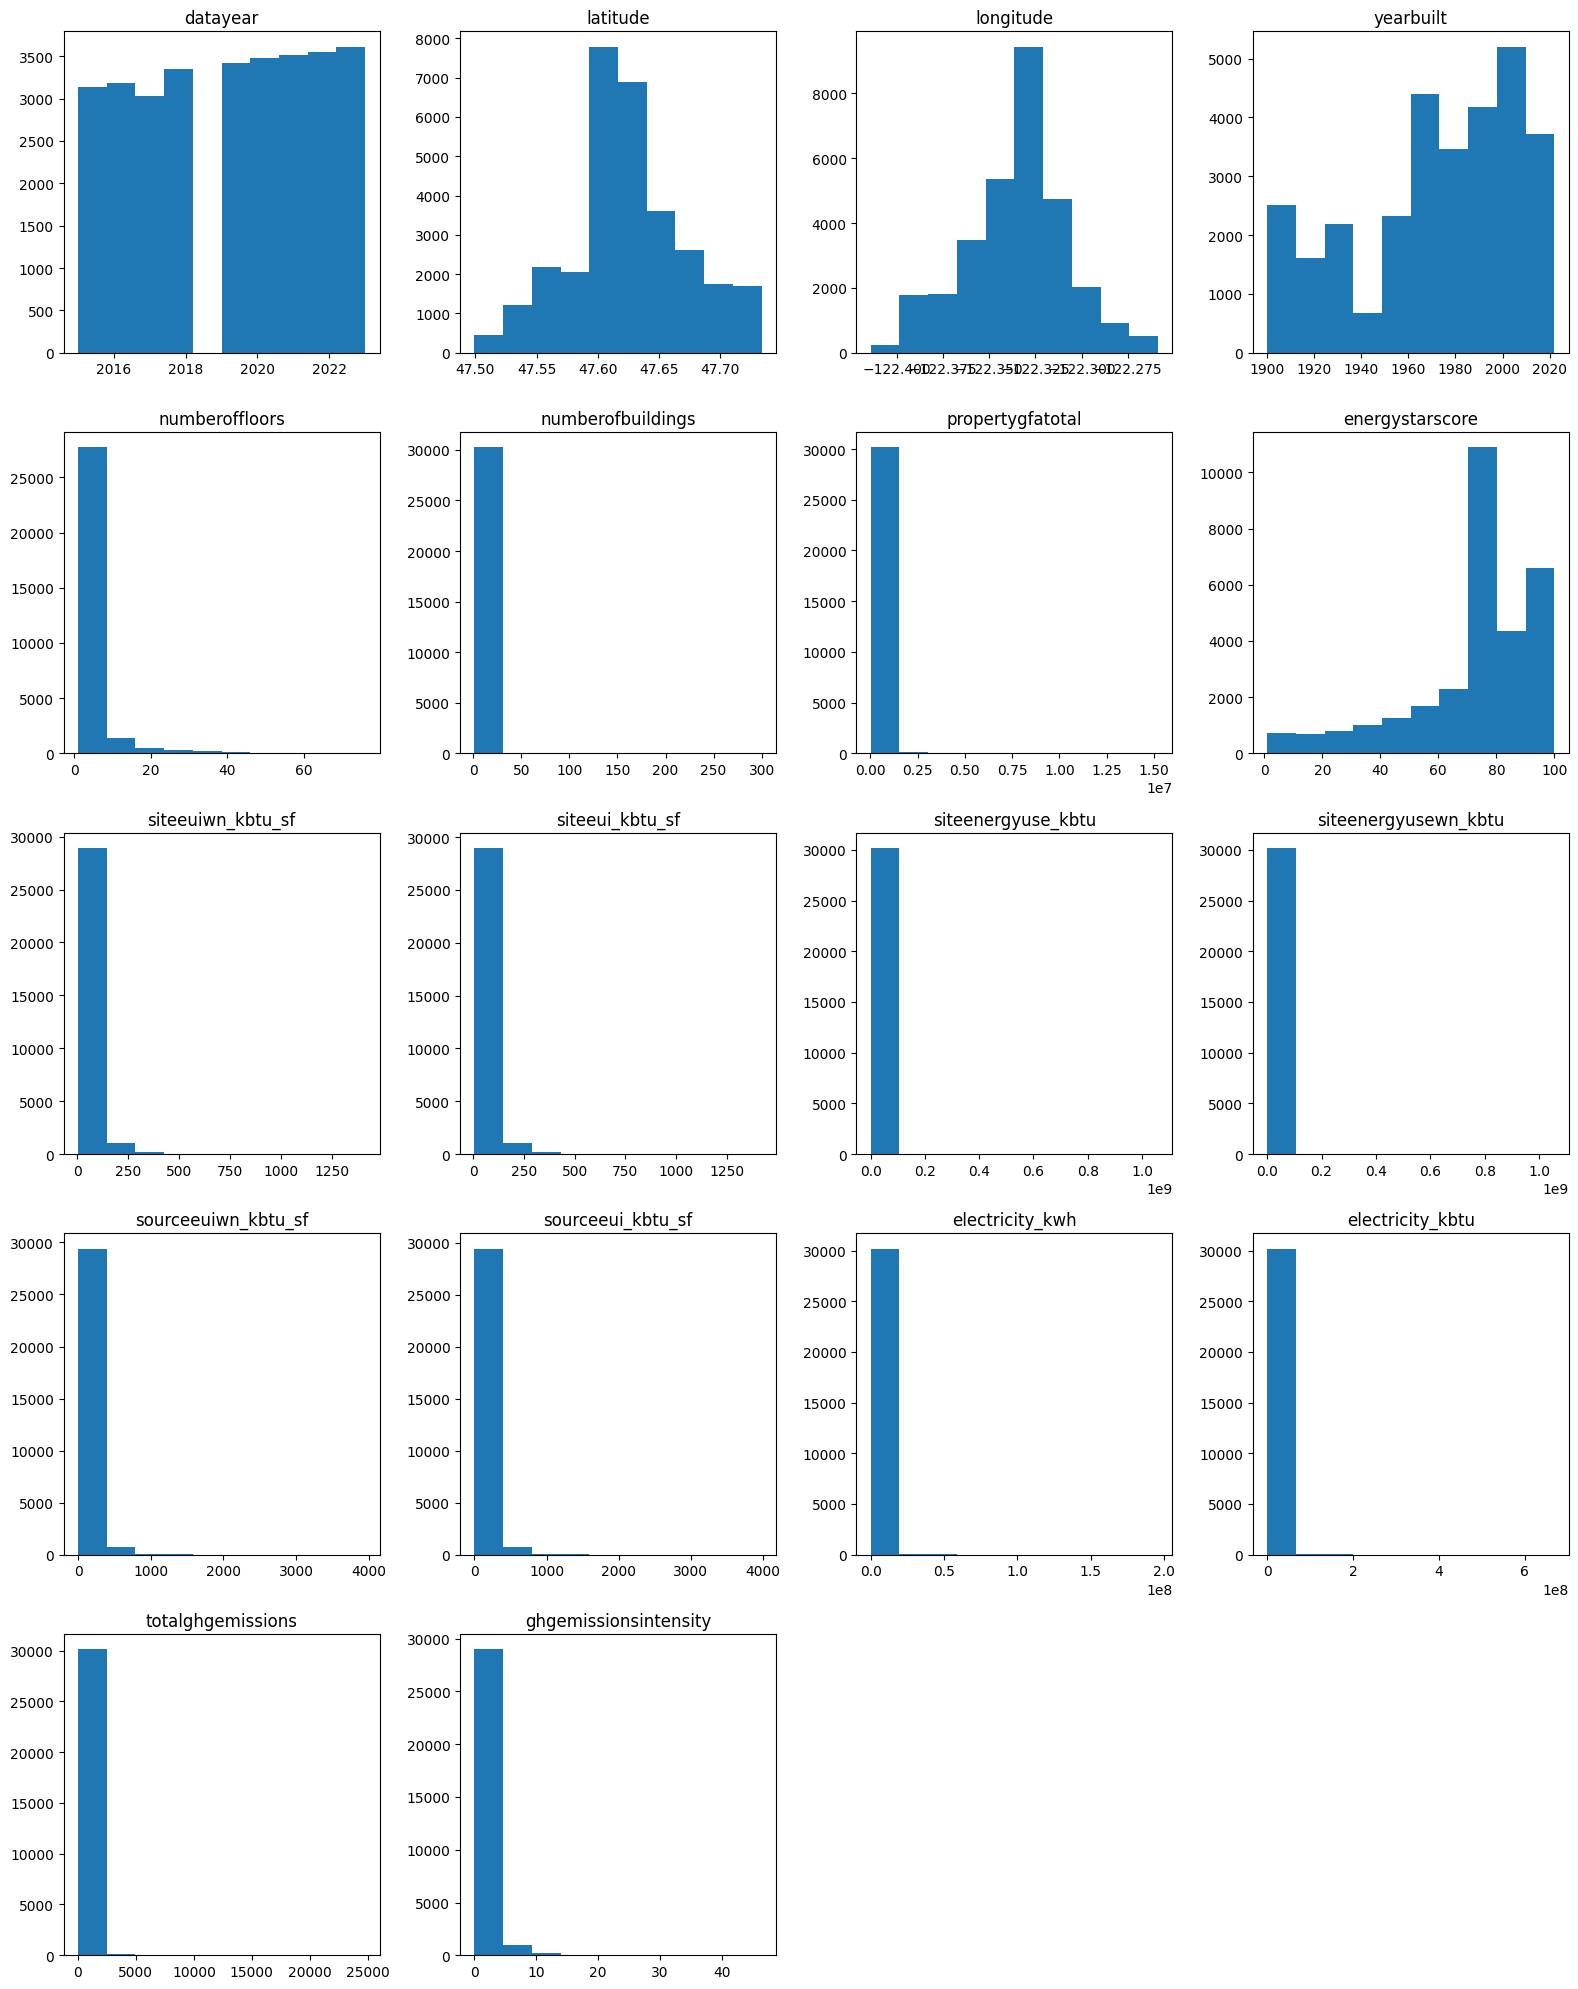

In [32]:
import math
import matplotlib.pyplot as plt

# Supongamos que numeric_cols es una lista de nombres de columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

ncols = 4
nrows = math.ceil(len(numeric_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()  # Para indexar fácilmente cada subplot

for i, col_name in enumerate(numeric_cols):
    # Graficar un histograma, por ejemplo
    axes[i].hist(df[col_name])
    axes[i].set_title(col_name)

# Si sobran ejes (subplots) porque la última fila no está completa, puedes ocultarlos:
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [33]:
columnas_numericas_ordinales = ['numberoffloors', 'numberofbuildings', 'datayear', 'yearbuilt', 'energystarscore']

columnas_numericas_continuas = [ item for item in numeric_cols if item not in columnas_numericas_ordinales]

columnas_numericas_continuas

['latitude',
 'longitude',
 'propertygfatotal',
 'siteeuiwn_kbtu_sf',
 'siteeui_kbtu_sf',
 'siteenergyuse_kbtu',
 'siteenergyusewn_kbtu',
 'sourceeuiwn_kbtu_sf',
 'sourceeui_kbtu_sf',
 'electricity_kwh',
 'electricity_kbtu',
 'totalghgemissions',
 'ghgemissionsintensity']

c:\Proyectos\seatle\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


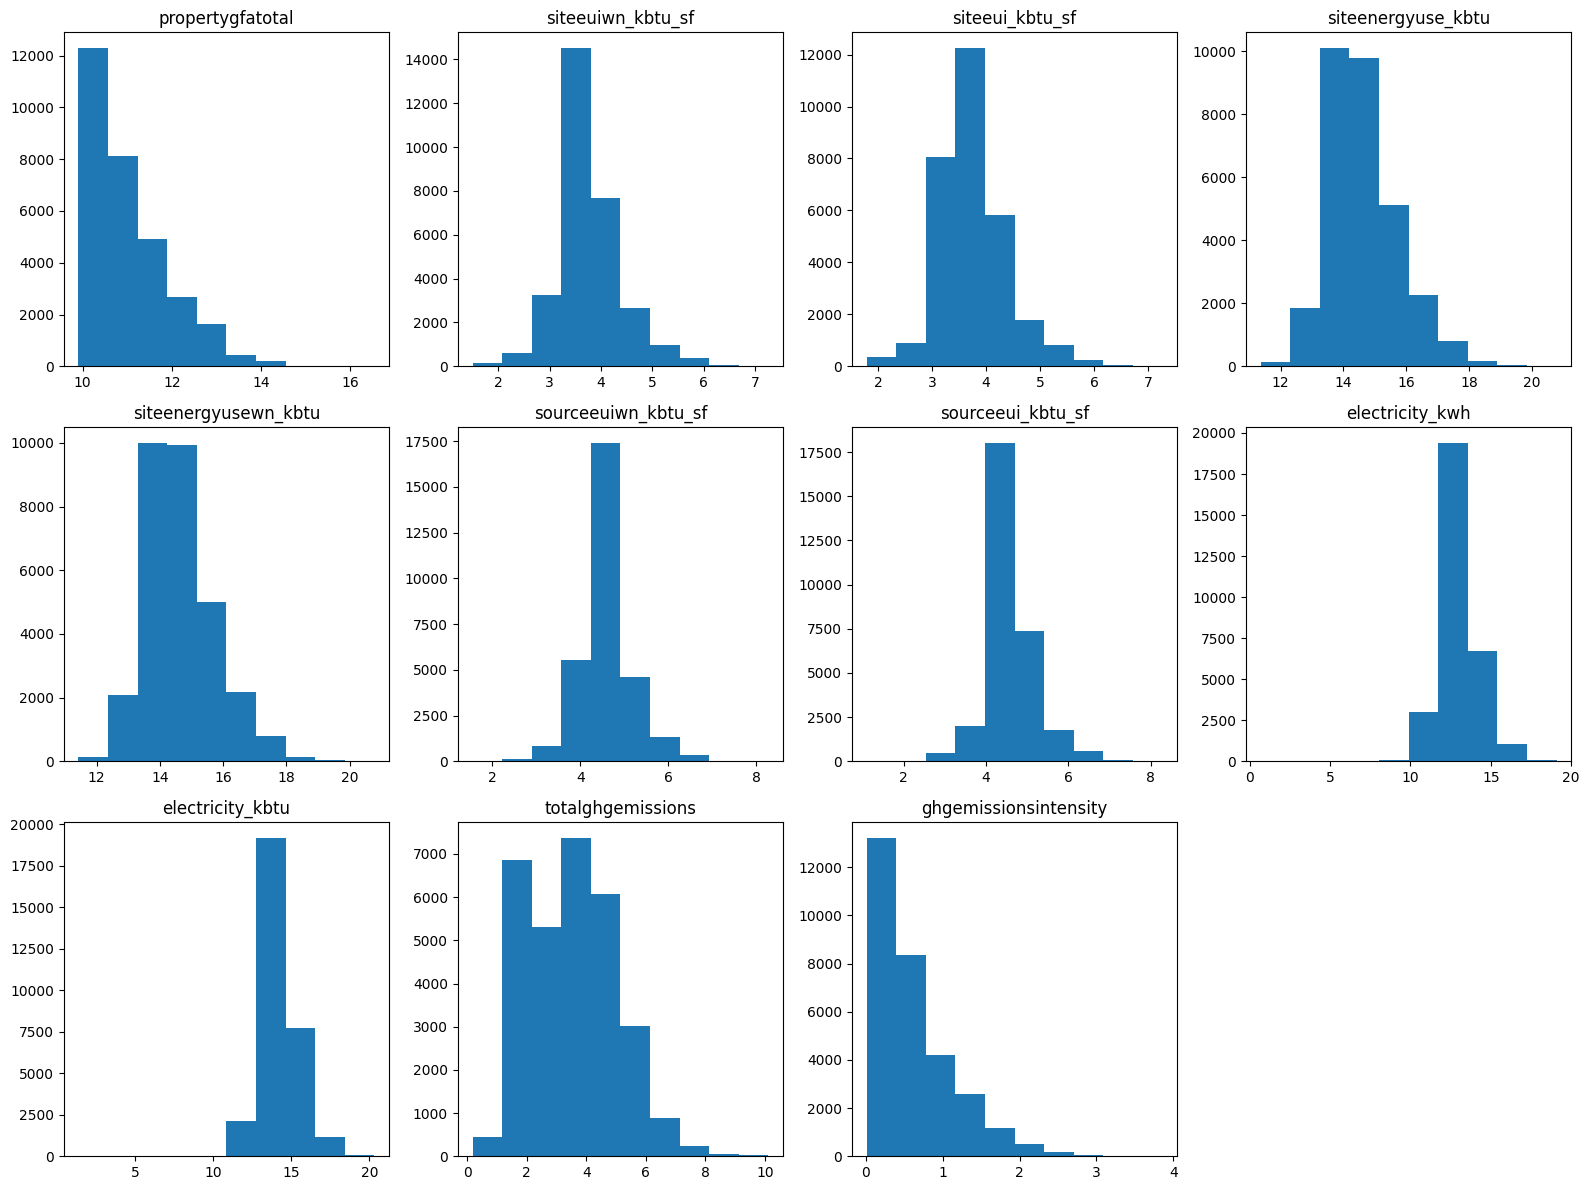

In [34]:

ncols = 4
nrows = math.ceil(len(columnas_numericas_continuas[2:]) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()  # Para indexar fácilmente cada subplot

for i, col_name in enumerate(columnas_numericas_continuas[2:]):
    # Graficar un histograma, por ejemplo
    valores = np.log1p(df[col_name])
    axes[i].hist(valores)
    axes[i].set_title(col_name)

# Si sobran ejes (subplots) porque la última fila no está completa, puedes ocultarlos:
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [35]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols

,buildingtype,neighborhood,epapropertytype,compliancestatus,complianceissue
0,Nonresidential,Downtown,Hotel,Compliant,No Issue
1,Nonresidential,Downtown,Hotel,Compliant,No Issue
2,Nonresidential,Downtown,Hotel,Compliant,No Issue
3,Nonresidential,Downtown,Hotel,Compliant,No Issue
4,Nonresidential,Downtown,Hotel,Compliant,No Issue
...,...,...,...,...,...
30652,Nonresidential,Magnolia / Queen Anne,Mixed Use Property,Compliant,No Issue
30653,Multifamily Lr (1-4),Downtown,Multifamily Lr (1-4),Compliant,No Issue
30654,Multifamily Mr (5-9),Northeast,Multifamily Mr (5-9),Compliant,No Issue
30655,Multifamily Hr (10+),Downtown,Multifamily Hr (10+),Compliant,No Issue


In [36]:
for col in categorical_cols:

    print(f'La cantidad de categorias para la {col} es de {df[col].nunique()}')

La cantidad de categorias para la buildingtype es de 6
La cantidad de categorias para la neighborhood es de 13
La cantidad de categorias para la epapropertytype es de 69
La cantidad de categorias para la compliancestatus es de 2
La cantidad de categorias para la complianceissue es de 11


interpretacion

In [37]:
frecuencia = df['epapropertytype'].value_counts()
df['epapropertytype_encoded'] = df['epapropertytype'].map(frecuencia)
df.drop(columns='epapropertytype', inplace=True)


C:\Users\kev_g\AppData\Local\Temp\ipykernel_31012\3733909367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['epapropertytype_encoded'] = df['epapropertytype'].map(frecuencia)
C:\Users\kev_g\AppData\Local\Temp\ipykernel_31012\3733909367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='epapropertytype', inplace=True)


In [38]:
df

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished,epapropertytype_encoded
0,2023,Nonresidential,47.61220,-122.33799,Downtown,1927,12.0,1.0,88434,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False,654
1,2023,Nonresidential,47.61307,-122.33361,Downtown,1996,11.0,1.0,103566,84.0,74.000000,73.900002,6539607.0,6545706.0,130.699997,130.600006,786237.0,Compliant,No Issue,2682640.0,220.0,2.49,False,654
2,2023,Nonresidential,47.61367,-122.33822,Downtown,1969,41.0,3.0,956110,75.0,77.599998,77.699997,64340116.0,64252124.0,165.500000,165.699997,11121130.0,Compliant,No Issue,37945296.0,2192.8,2.89,False,654
3,2023,Nonresidential,47.61412,-122.33664,Downtown,1926,10.0,1.0,61320,55.0,81.000000,82.099998,5033692.0,4966592.0,162.199997,165.300003,780180.0,Compliant,No Issue,2661973.0,176.1,2.87,False,654
4,2023,Nonresidential,47.61375,-122.34047,Downtown,1980,18.0,1.0,175580,83.0,104.000000,104.300003,12875073.0,12838968.0,176.399994,177.300003,1401668.0,Compliant,No Issue,4782491.0,456.6,4.02,False,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,2015,Nonresidential,47.66144,-122.38723,Magnolia / Queen Anne,2014,2.0,1.0,25532,84.0,29.100000,26.799999,628609.0,682675.0,91.300003,84.000000,184235.0,Compliant,No Issue,628609.0,3.6,0.14,False,1004
30653,2015,Multifamily Lr (1-4),47.59980,-122.32034,Downtown,2000,4.0,1.0,44650,71.0,27.799999,25.600000,1142949.0,1240429.0,87.199997,80.400002,334979.0,Compliant,No Issue,1142949.0,6.6,0.15,False,9230
30654,2015,Multifamily Mr (5-9),47.65756,-122.31584,Northeast,2014,7.0,1.0,42393,98.0,55.099998,48.599998,1543282.0,1750143.0,144.699997,124.199997,325705.0,Compliant,No Issue,1111306.0,29.3,0.69,False,5998
30655,2015,Multifamily Hr (10+),47.61652,-122.33735,Downtown,2015,40.0,1.0,319481,79.0,61.400002,52.700001,16834414.0,19623362.0,102.199997,93.099998,1690364.0,Compliant,No Issue,5767522.0,620.0,2.23,False,1084


<Axes: >

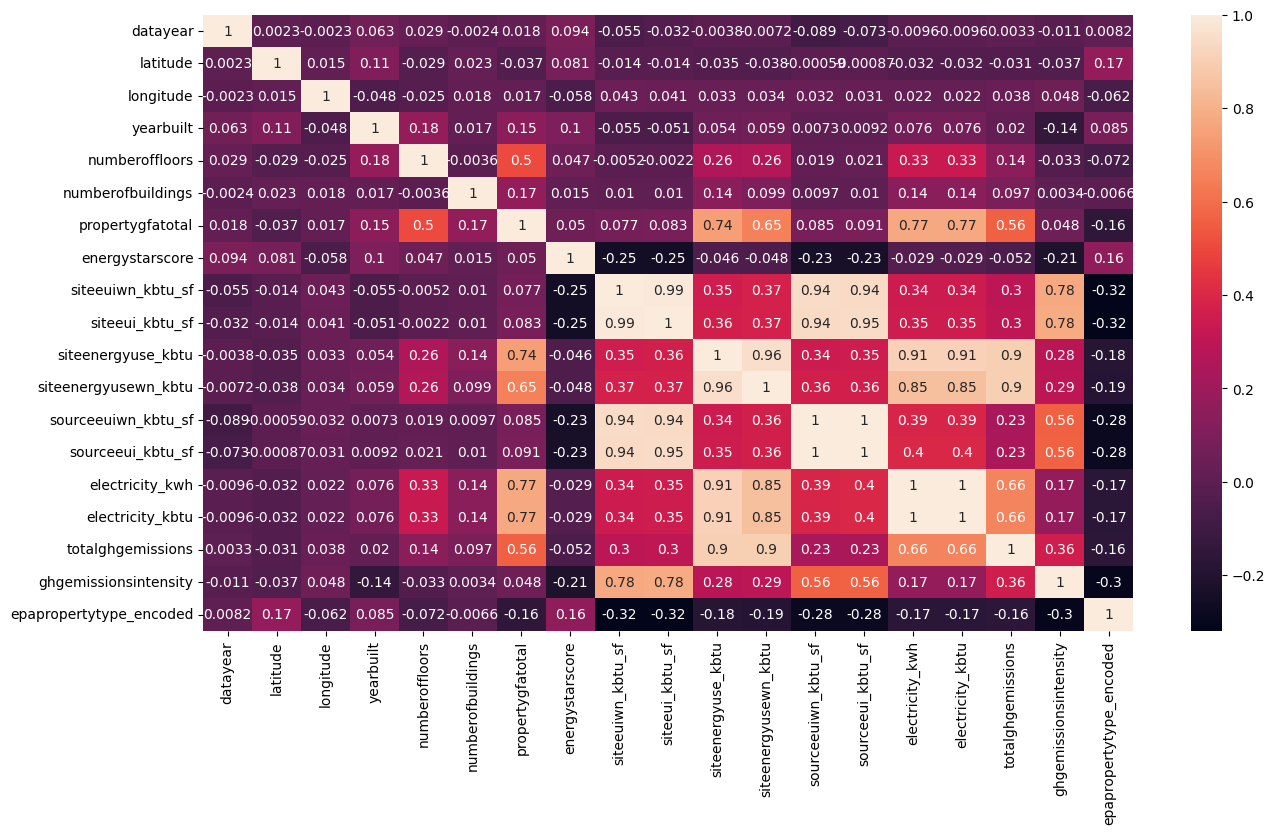

In [39]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [40]:
df.select_dtypes(include='number').corr().loc['electricity_kwh'].sort_values()

epapropertytype_encoded   -0.171421
latitude                  -0.032416
energystarscore           -0.029484
datayear                  -0.009642
longitude                  0.022498
yearbuilt                  0.076209
numberofbuildings          0.139353
ghgemissionsintensity      0.171282
numberoffloors             0.334343
siteeuiwn_kbtu_sf          0.343589
siteeui_kbtu_sf            0.350061
sourceeuiwn_kbtu_sf        0.391708
sourceeui_kbtu_sf          0.397451
totalghgemissions          0.662854
propertygfatotal           0.768790
siteenergyusewn_kbtu       0.848496
siteenergyuse_kbtu         0.908788
electricity_kbtu           1.000000
electricity_kwh            1.000000
Name: electricity_kwh, dtype: float64

razonamiento



siteenergyuse_kbtu altamente correlacionada con siteenergyusewn_kbtu por lo que se debe eliminar una


In [41]:
df.drop(columns=['electricity_kbtu','siteenergyuse_kbtu', 'siteenergyusewn_kbtu', 'totalghgemissions', 'ghgemissionsintensity', 'sourceeui_kbtu_sf', 'sourceeuiwn_kbtu_sf',
                 'siteeuiwn_kbtu_sf', 'siteeui_kbtu_sf'], axis=1, inplace=True)

C:\Users\kev_g\AppData\Local\Temp\ipykernel_31012\3502806844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['electricity_kbtu','siteenergyuse_kbtu', 'siteenergyusewn_kbtu', 'totalghgemissions', 'ghgemissionsintensity', 'sourceeui_kbtu_sf', 'sourceeuiwn_kbtu_sf',


<Axes: >

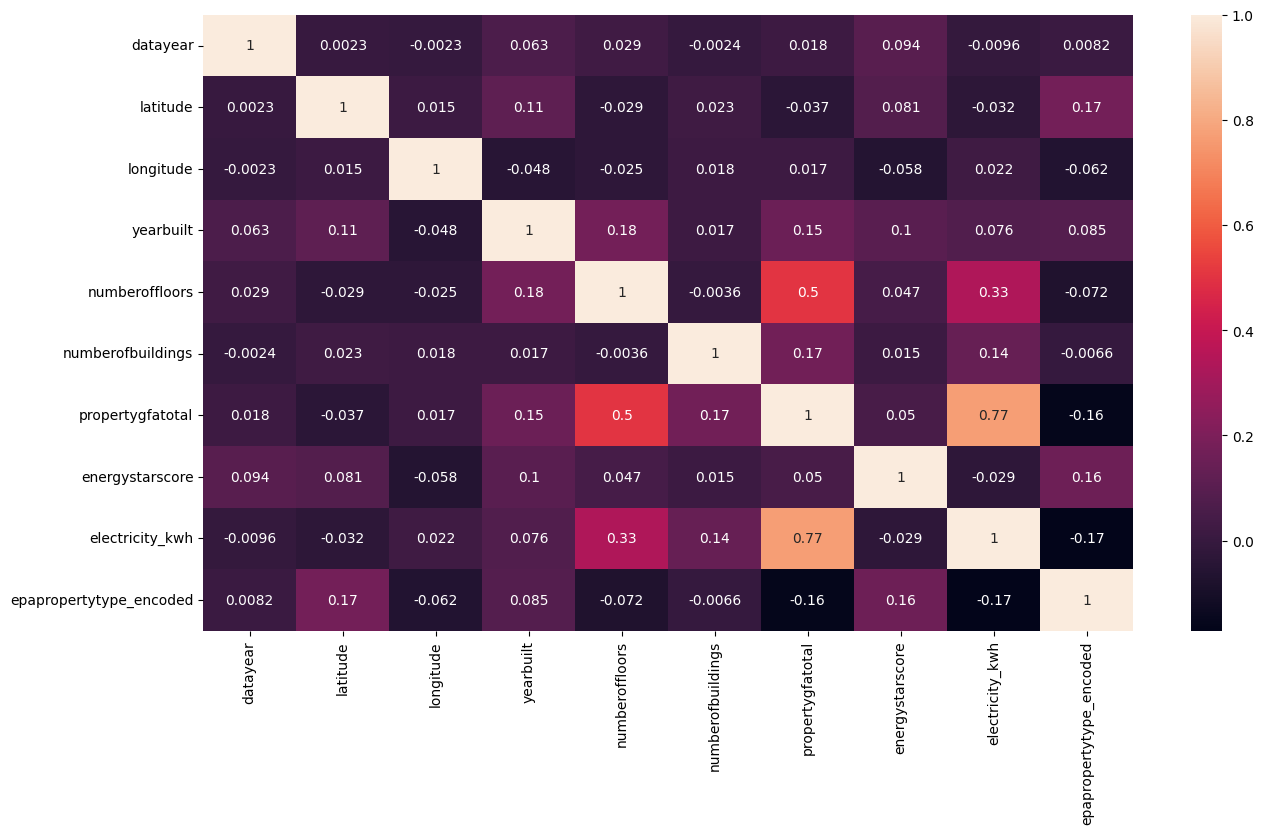

In [42]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [43]:
categorical_cols = ['buildingtype', 'neighborhood', 'compliancestatus', 'complianceissue']

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoding = OneHotEncoder(sparse_output=False)

encoded_data = encoding.fit_transform(df[categorical_cols])
nuevos_nombres_columnas = encoding.get_feature_names_out()

df_encoded = pd.DataFrame(encoded_data, columns=nuevos_nombres_columnas)
df_encoded



,buildingtype_Campus,buildingtype_Multifamily Hr (10+),buildingtype_Multifamily Lr (1-4),buildingtype_Multifamily Mr (5-9),buildingtype_Nonresidential,buildingtype_Sps-District K-12,neighborhood_Ballard,neighborhood_Central,neighborhood_Delridge Neighborhoods,neighborhood_Downtown,neighborhood_East,neighborhood_Greater Duwamish,neighborhood_Lake Union,neighborhood_Magnolia / Queen Anne,neighborhood_North,neighborhood_Northeast,neighborhood_Northwest,neighborhood_Southeast,neighborhood_Southwest,compliancestatus_Compliant,compliancestatus_Not Compliant,complianceissue_Account Requires Verification,complianceissue_Default Data,complianceissue_Missing Data,complianceissue_Missing Eui Or Electricity Data,complianceissue_Missing Eui Or Utility Data,complianceissue_Missing Eui Or Utility Data And Account Requires Verification,"complianceissue_Missing Eui, Incomplete Electricity Data","complianceissue_Missing Eui, Incomplete Fuel Data","complianceissue_Missing Eui, Incomplete Natural Gas Data",complianceissue_No Issue,complianceissue_Portfolio Manager Not Connected To The City Of Seattle
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30275,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df_numerico = df.select_dtypes(include='number')

In [46]:
df_numerico

,datayear,latitude,longitude,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,electricity_kwh,epapropertytype_encoded
0,2023,47.61220,-122.33799,1927,12.0,1.0,88434,61.0,1047120.0,654
1,2023,47.61307,-122.33361,1996,11.0,1.0,103566,84.0,786237.0,654
2,2023,47.61367,-122.33822,1969,41.0,3.0,956110,75.0,11121130.0,654
3,2023,47.61412,-122.33664,1926,10.0,1.0,61320,55.0,780180.0,654
4,2023,47.61375,-122.34047,1980,18.0,1.0,175580,83.0,1401668.0,654
...,...,...,...,...,...,...,...,...,...,...
30652,2015,47.66144,-122.38723,2014,2.0,1.0,25532,84.0,184235.0,1004
30653,2015,47.59980,-122.32034,2000,4.0,1.0,44650,71.0,334979.0,9230
30654,2015,47.65756,-122.31584,2014,7.0,1.0,42393,98.0,325705.0,5998
30655,2015,47.61652,-122.33735,2015,40.0,1.0,319481,79.0,1690364.0,1084


In [47]:
df_encoded.shape

(30280, 32)

In [48]:
df_encoded.tail()

,buildingtype_Campus,buildingtype_Multifamily Hr (10+),buildingtype_Multifamily Lr (1-4),buildingtype_Multifamily Mr (5-9),buildingtype_Nonresidential,buildingtype_Sps-District K-12,neighborhood_Ballard,neighborhood_Central,neighborhood_Delridge Neighborhoods,neighborhood_Downtown,neighborhood_East,neighborhood_Greater Duwamish,neighborhood_Lake Union,neighborhood_Magnolia / Queen Anne,neighborhood_North,neighborhood_Northeast,neighborhood_Northwest,neighborhood_Southeast,neighborhood_Southwest,compliancestatus_Compliant,compliancestatus_Not Compliant,complianceissue_Account Requires Verification,complianceissue_Default Data,complianceissue_Missing Data,complianceissue_Missing Eui Or Electricity Data,complianceissue_Missing Eui Or Utility Data,complianceissue_Missing Eui Or Utility Data And Account Requires Verification,"complianceissue_Missing Eui, Incomplete Electricity Data","complianceissue_Missing Eui, Incomplete Fuel Data","complianceissue_Missing Eui, Incomplete Natural Gas Data",complianceissue_No Issue,complianceissue_Portfolio Manager Not Connected To The City Of Seattle
30275,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30279,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
df_numerico.shape

(30280, 10)

In [50]:
df_concatenado = pd.concat([
    df_encoded.reset_index(drop=True),
    df_numerico.reset_index(drop=True)
], axis=1)

In [51]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30280 entries, 0 to 30279
Data columns (total 42 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   buildingtype_Campus                                                            30280 non-null  float64
 1   buildingtype_Multifamily Hr (10+)                                              30280 non-null  float64
 2   buildingtype_Multifamily Lr (1-4)                                              30280 non-null  float64
 3   buildingtype_Multifamily Mr (5-9)                                              30280 non-null  float64
 4   buildingtype_Nonresidential                                                    30280 non-null  float64
 5   buildingtype_Sps-District K-12                                                 30280 non-null  float64
 6   neighborhood_Ballard  

In [56]:
X = df_concatenado.drop(columns='electricity_kwh')
y = df_concatenado[['electricity_kwh']]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y, random_state=32, shuffle=True, train_size=0.8)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  # Aprende y transforma solo el training set
X_test = scaler.transform(X_test)  

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


models = {
    'linear_regresion': LinearRegression(),
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
    'bayesian_ridge': BayesianRidge(),
    'knn_regressor': KNeighborsRegressor(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'svr': SVR()
}


r2_score_train = dict()
r2_score_test = dict()

for name, model in models.items():

    # Entrenar el modelo
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    r_score_test_ = r2_score(y_test, y_pred_test)

    y_pred_train = model.predict(X_train)

    r_score_train_ = r2_score(y_train, y_pred_train)

    r2_score_train[name] = r_score_train_

    r2_score_test[name] = r_score_test_


print(r2_score_test, 'test')
print(r2_score_train, 'train')




c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.847e+15, tolerance: 3.006e+13
  model = cd_fast.enet_coordinate_descent(
c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector

{'linear_regresion': 0.6666704350884058, 'ridge_regression': 0.666677010008453, 'lasso_regression': 0.6666705847852173, 'bayesian_ridge': 0.6668138410927806, 'knn_regressor': 0.7434958443896662, 'decision_tree': 0.9686034399273519, 'random_forest': 0.9752162226477125, 'gradient_boosting': 0.8525335105855949, 'svr': -0.0661209777322187} test
{'linear_regresion': 0.6081642432586292, 'ridge_regression': 0.6081642405808729, 'lasso_regression': 0.6081642432224861, 'bayesian_ridge': 0.6081629354426148, 'knn_regressor': 0.745704503229762, 'decision_tree': 1.0, 'random_forest': 0.9734473313031603, 'gradient_boosting': 0.8637688813700763, 'svr': -0.038237497218361005} train


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],             
    'max_depth': [None, 10, 20, 30],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],              
    'max_features': ['auto', 'sqrt', 'log2'],       
    'bootstrap': [True, False]                
}

model = RandomForestRegressor()
gs = GridSearchCV(model, params, scoring='accuracy', cv = 5, n_jobs=-1,verbose=2)

gs.fit(X_train, y_train.values.ravel())



Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



0.666670616903614
0.608164243258629
